# VNExpress News Data Overview
VNEXpress là một trong những trang báo điện tử lớn nhất tại Việt Nam, cung cấp tin tức về nhiều lĩnh vực như chính trị, kinh tế, xã hội, thể thao, giải trí và công nghệ. Dưới đây là một số thông tin về dữ liệu từ VNExpress:
* 1. Nguồn dữ liệu: VNExpress
* 2. Thời gian thu thập: Từ tháng 1 năm 2025 đến tháng 12 năm 2025
* 3. Các lĩnh vực tin tức: Công nghệ, Khoa học, Thể thao, Giải trí, Chính trị, Kinh tế, Xã hội,...
* 4. Số lượng bài viết: Khoảng 100.000 bài viết

Notebook này thực hiện khảo sát và thống kê sơ bộ dữ liệu thu thập từ VNExpress, tập trung vào hai nhóm bài viết: 
* "Khoa học" và "Công nghệ".

## Dữ liệu bao gồm các trường
* `title`: Tiêu đề bài viết
* `description`: Mô tả ngắn gọn 
* `content`: Nội dung bài viết
* `group`: Danh mục bài viết (Công nghệ, Khoa học)
* `category`: Thể loại bài viết (Ví dụ: Tin tức, Phân tích, Đánh giá)
* `date`: Ngày xuất bản bài viết
* `author`: Tác giả bài viết
* `url`: Đường dẫn đến bài viết
* `thumbnail`: Đường dẫn đến hình ảnh đại diện bài viết
* `tags`: Các thẻ liên quan đến bài viết
* `nums_of_comments`: Số lượng bình luận bài viết

## 1. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import re
from collections import Counter

# Thiết lập để hiển thị biểu đồ đẹp hơn
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Để hiển thị Tiếng Việt đúng
plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.filterwarnings('ignore')

## 2.  Đọc và tìm hiểu dữ liệu

Data được crawl - crawl.pypy

In [2]:
import sys
import os

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Now use an absolute import
from scripts.crawl_data import crawl_data

# crawl_data()

### 2.1. Đọc dữ liệu từ file CSV

In [9]:
df = pd.read_csv('../data/vnexpress_raw_data.csv',encoding='utf-8')

# Hiển thị thông tin cơ bản của tập dữ liệu
print(f"Kích thước dữ liệu: {df.shape}")
print("\nThông tin cột:")
df.info()

Kích thước dữ liệu: (1184, 11)

Thông tin cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             1184 non-null   object
 1   description       1182 non-null   object
 2   date              1182 non-null   object
 3   category          1128 non-null   object
 4   thumbnail         1143 non-null   object
 5   content           1181 non-null   object
 6   author            932 non-null    object
 7   tags              1184 non-null   object
 8   group             1184 non-null   object
 9   nums_of_comments  1184 non-null   int64 
 10  url               1184 non-null   object
dtypes: int64(1), object(10)
memory usage: 101.9+ KB


In [10]:
df.head(2)

,title,description,date,category,thumbnail,content,author,tags,group,nums_of_comments,url
0,Elon Musk ra chatbot AI 'thông minh nhất Trái ...,"xAI, công ty do Elon Musk sáng lập, công bố Gr...","Thứ ba, 18/2/2025, 12:30 (GMT+7)",AI,https://i1-sohoa.vnecdn.net/2025/02/18/Screens...,"Trong livestream ra mắt Grok 3 trên X, diễn ra...",Bảo Lâm,elon musk,Công nghệ,118,https://vnexpress.net/elon-musk-ra-chatbot-ai-...
1,Winsler 70W Ultra Slim - củ sạc laptop mỏng nh...,"Củ sạc Winsler 70W có độ mỏng 12,8 mm, tích hợ...","Thứ năm, 6/3/2025, 16:00 (GMT+7)",Thiết bị,https://i1-sohoa.vnecdn.net/2025/03/06/1-17412...,So với các củ sạc laptop công suất 70W của các...,NaN,"winsler, sạc laptop",Công nghệ,0,https://vnexpress.net/winsler-70w-ultra-slim-c...


In [21]:
print("Số lượng giá trị thiếu trong mỗi cột:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})
missing_df

Số lượng giá trị thiếu trong mỗi cột:


,Missing Values,Percentage (%)
title,0,0.00
description,2,0.17
date,2,0.17
category,56,4.73
thumbnail,41,3.46
content,3,0.25
author,252,21.28
tags,0,0.00
group,0,0.00
nums_of_comments,0,0.00


In [22]:
print("Thống kê mô tả cho các cột số:")
df.describe().T

Thống kê mô tả cho các cột số:


,count,mean,std,min,25%,50%,75%,max
nums_of_comments,1184.0,29.304899,47.305494,0.0,3.0,12.0,33.0,389.0


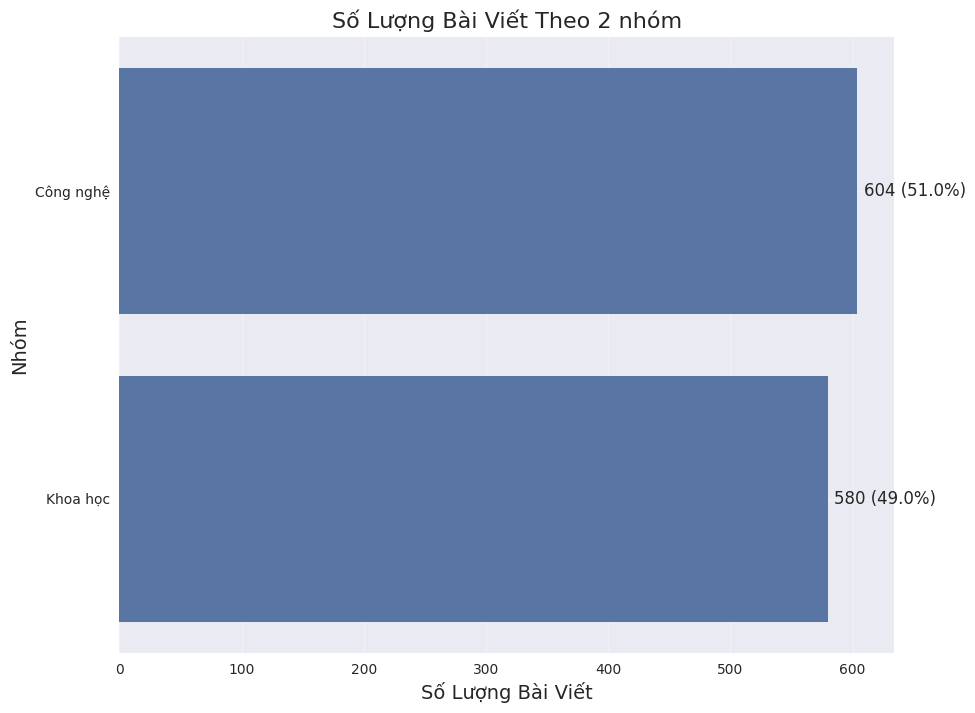

Tổng số bài viết: 1184
- Công nghệ: 604 bài viết (51.0%)
- Khoa học: 580 bài viết (49.0%)


In [28]:
plt.figure(figsize=(10, 8))
category_counts = df['group'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.title('Số Lượng Bài Viết Theo 2 nhóm', fontsize=16)
plt.xlabel('Số Lượng Bài Viết', fontsize=14)
plt.ylabel('Nhóm', fontsize=14)
plt.grid(True, alpha=0.3)

# Add count labels on bars
for i, v in enumerate(category_counts.values):
    plt.text(v + 5, i, f"{v} ({v/len(df)*100:.1f}%)", va='center')

plt.show()

# Add text summary below the plot
print(f"Tổng số bài viết: {len(df)}")
for group, count in category_counts.items():
    print(f"- {group}: {count} bài viết ({count/len(df)*100:.1f}%)")

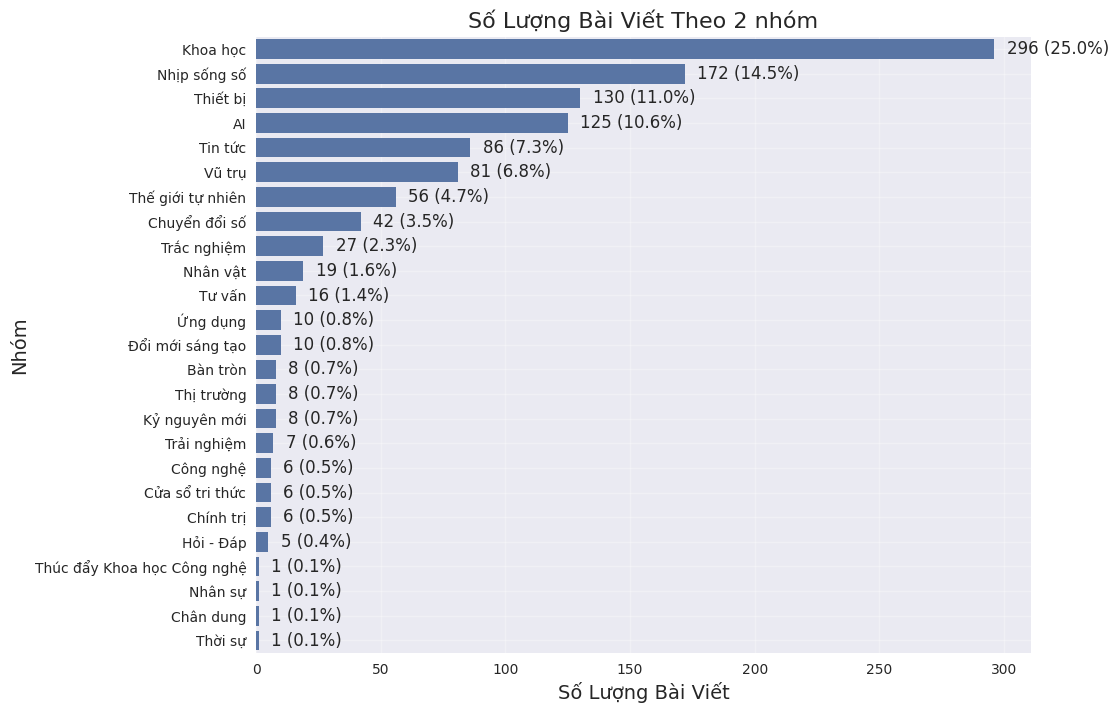

Tổng số bài viết: 1184
- Khoa học: 296 bài viết (25.0%)
- Nhịp sống số: 172 bài viết (14.5%)
- Thiết bị: 130 bài viết (11.0%)
- AI: 125 bài viết (10.6%)
- Tin tức: 86 bài viết (7.3%)
- Vũ trụ: 81 bài viết (6.8%)
- Thế giới tự nhiên: 56 bài viết (4.7%)
- Chuyển đổi số: 42 bài viết (3.5%)
- Trắc nghiệm: 27 bài viết (2.3%)
- Nhân vật: 19 bài viết (1.6%)
- Tư vấn: 16 bài viết (1.4%)
- Ứng dụng: 10 bài viết (0.8%)
- Đổi mới sáng tạo: 10 bài viết (0.8%)
- Bàn tròn: 8 bài viết (0.7%)
- Thị trường: 8 bài viết (0.7%)
- Kỷ nguyên mới: 8 bài viết (0.7%)
- Trải nghiệm: 7 bài viết (0.6%)
- Công nghệ: 6 bài viết (0.5%)
- Cửa sổ tri thức: 6 bài viết (0.5%)
- Chính trị: 6 bài viết (0.5%)
- Hỏi - Đáp: 5 bài viết (0.4%)
- Thúc đẩy Khoa học Công nghệ: 1 bài viết (0.1%)
- Nhân sự: 1 bài viết (0.1%)
- Chân dung: 1 bài viết (0.1%)
- Thời sự: 1 bài viết (0.1%)


In [34]:
plt.figure(figsize=(10, 8))
category_counts = df['category'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values)
plt.title('Số Lượng Bài Viết Theo 2 nhóm', fontsize=16)
plt.xlabel('Số Lượng Bài Viết', fontsize=14)
plt.ylabel('Nhóm', fontsize=14)
plt.grid(True, alpha=0.3)

# Add count labels on bars
for i, v in enumerate(category_counts.values):
    plt.text(v + 5, i, f"{v} ({v/len(df)*100:.1f}%)", va='center')

plt.show()

# Add text summary below the plot
print(f"Tổng số bài viết: {len(df)}")
for category, count in category_counts.items():
    print(f"- {category}: {count} bài viết ({count/len(df)*100:.1f}%)")

# Xác định bài toán phù hợp với dữ liệu
## Hướng 1: Dự đoán số lượng bình luận (nums_of_comments)

* Mục tiêu: Dự đoán số lượng bình luận bài viết.

* Vấn đề: Phân phối số bình luận lệch, có nhiều ngoại lệ (outliers). Trung bình là 40.67 nhưng trung vị chỉ 18. Dữ liệu có thiếu sót lớn, đặc biệt là cột tác giả (author).

* Khó khăn: Cần xử lý ngoại lệ, phân phối lệch (log-transform) và dữ liệu thiếu. Mô hình hồi quy có thể khó dự đoán chính xác.

* Kết luận: Không thực sự khả thi, độ chính xác thấp.
    
## Hướng 2: Phân loại bài viết thành Khoa học / Công nghệ (group)

* Mục tiêu: Dự đoán bài viết thuộc nhóm Khoa học hay Công nghệ.

* Ưu điểm: Dữ liệu không bị lệch, có thể sử dụng các đặc trưng văn bản như title, content, tags. Các mô hình phân loại như SVM, Random Forest hoặc Deep Learning có thể áp dụng tốt.

* Khả thi: Dễ dàng xây dựng mô hình phân loại, với ứng dụng thực tế cao trong việc phân loại bài viết tự động.

* Kết luận: Bài toán phân loại Khoa học / Công nghệ khả thi hơn, dễ triển khai và có ứng dụng thực tế cao.

## Lựa chọn cuối cùng:

Chọn bài toán phân loại Khoa học / Công nghệ vì tính khả thi và ứng dụng thực tế cao hơn so với bài toán hồi quy dự đoán số bình luận.